### Тема: Решение задачи Коши для обыкновенных дифференциальных уравнений
#### Выполнил: Джугели Дмитрий Александрович (ИВТ-23) (d_d_a_37@mail.ru)
#### Преподаватель: Гурьянов М.А., кафедра ВМ-1
#### Лабораторная работа №6, Вариант 10.
#### Весенний семестр, 2022 год
#### МИЭТ, Зеленоград

### 1. Теоретическая справка 

####1. Дайте определение задачи Коши для ОДУ n-го порядка. Преобразование к системе дифференциальных уравнений 1-го порядка.

Обыкновенное дифференциальное уравнение имеет вид:
$$\large F(x, u(x), u'(x)...u^{(n)}) = 0$$

В общем случае такие уравнения имеют бесконечно много решений. 

**Задача Коши** для дифференциального порядка имеет вид:

\begin{equation*}
    \begin{cases}
    u' = f(x, u), x \in [a, b],
    \\
    u(x_{a}) = u_{a}
\end{cases}
\end{equation*}

####2. Явный и неявный метод Эйлера.

Метод Эйлера — простейший численный метод решения систем обыкновенных дифференциальных уравнений. Впервые описан Леонардом Эйлером в 1768 году в работе «Интегральное исчисление». Метод Эйлера является явным, одношаговым методом первого порядка точности. Он основан на аппроксимации интегральной кривой кусочно-линейной функцией, так называемой ломаной Эйлера.

Пусть дана задача Коши для уравнения первого порядка: $${\displaystyle {\frac {dy}{dx}}=f(x,y),}$$

$${\displaystyle y_{|_{x=x_{0}}}=y_{0},} $$

где функция $ {\displaystyle f} $ определена на некоторой области ${\displaystyle D\subset \mathbb {R} ^{2}}$. Решение ищется на интервале $ {\displaystyle (x_{0},b]}$. На этом интервале введем узлы: $ {\displaystyle x_{0}<x_{1}<\dots <x_{n}\leq b.}$ . Приближенное решение в узлах $ {\displaystyle x_{i}}  $, которое обозначим через $ {\displaystyle y_{i}} $, определяется по формуле: $${\displaystyle y_{i}=y_{i-1}+(x_{i}-x_{i-1})f(x_{i-1},y_{i-1}),\quad i=1,2,3,\dots ,n.}$$

Эти формулы непосредственно обобщаются на случай систем обыкновенных дифференциальных уравнений. 

####3.  Методы Рунге-Кутты.

Метод Рунге — Кутты четвёртого порядка при вычислениях с постоянным шагом интегрирования столь широко распространён, что его часто называют просто методом Рунге — Кутты.


Аналогично предыдущему методу, при использовании данного алгоритма каждое следующее значение $y_{i}$ высчитывается реккурентно.  

$$\large y_{n+1} = y_{n} + \frac{h}{6} (k_1 + 2 \cdot k_2 + 2 \cdot k_3 + k_4)$$

Коэффициенты вычисляются по формуле:  

$$\large k_1 = f(x_n,y_n)$$  
$$\large k_2 = f(x_n + \frac{h}{2}, y_n + \frac{h}{2} \cdot k_1)$$  
$$\large k_3 = f(x_n + \frac{h}{2}, y_n + \frac{h}{2} \cdot k_2)$$  
$$\large k_4 = f(x_n + h, y_n + h\cdot k_3)$$

### 2. Постановка задачи.


Порядок выполнения работы:
1.Выбрать вариант согласно номера компьютера.

2.Решить ОДУ, написав m-файл. Использовать явный метод Эйлера и метод Рунге-Кутты 4-го порядка.

3.Решить ОДУ с использованием оператора ode45.

4.Построить графики, сравнить результаты

Дано уравнение:

$  u' = (u - t)/( u + t), u(0) = 1, [0,1], h = 0.02 $

### 2. Решение и точность.


В качестве входных данных используем:
* Дифференциальное уравнение
* Дополнительное условие (задача Коши)


Результатом работы программы получаем:
* Сеточное решение ОДУ (пары $(x_i, y_i)$ значений искомой функции)
* График решения дифференциального уравнения

Решение будет производиться двумя способами: явным методом Эйлера и методом Рунге-Кутты 4 порядка.

Метод Эйлера имеет второй порядок аппроксимации $O(h^2)$, следовательно и второй порядок точности.  

Метод Кутты-Рунге является куда более точным: Этот метод имеет четвёртый порядок точности. Это значит, что ошибка на одном шаге имеет порядок ${\displaystyle O(h^{5})}$, а суммарная ошибка на конечном интервале интегрирования имеет порядок ${\displaystyle O(h^{4})}$.

### 4. Программная реализайия.


[Задание 1

> Использовать явный метод Эйлера.



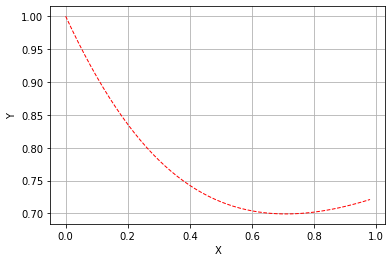

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sp

difur = lambda u, t: ((u-t)/(u+t))
h = 0.02
u0 = 1
segment = [0, 1] 
grid = np.arange(segment[0], segment[1], h)
def plot(x, y, type="b", lw=1, label="", end=False, x_text="X", y_text="Y"):
  plt.plot(x,y, type, label=label, lw=lw)
  plt.xlabel(x_text)
  plt.ylabel(y_text)
  plt.grid(True)
  if label != "":
      plt.legend()
  if end:
    plt.show()
def Method_Euler(df, h, xk, y0, plotOn=True):
    yk = np.zeros(len(xk))
    yk[0] = y0

    for i in range(len(xk) - 1):
        yk[i+1] = yk[i] + h * df(xk[i], yk[i])
    if(plotOn):
        plot(xk, yk, type='--r'  ,end=True)
    return yk
y_Euler = Method_Euler(difur, h, grid, u0)


Задание 2
> 




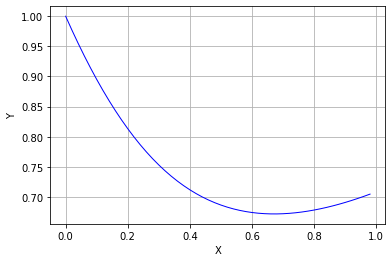

In [18]:
def Method_Runge(df, h , xk, y0, silence=False):
    yk = np.zeros(len(xk))
    yk[0] = y0
    for i in range(len(xk) - 1):
        k1 = df(xk[i], yk[i])
        k2 = df(xk[i] + h/2, yk[i] + h/2 * k1)
        k3 = df(xk[i] + h/2, yk[i] + h/2 * k2)
        k4 = df(xk[i] + h, yk[i] + h * k3)
        yk[i + 1] =  yk[i] + h/6 * (k1 + 2 * k2 + 3 * k3 + k4 )
    if(not silence):
        plot(xk, yk, end=True)
    return yk
y_Runge = Method_Runge(difur, h, grid, u0)

Задание 3
>ешить ОДУ с использованием оператора ode45



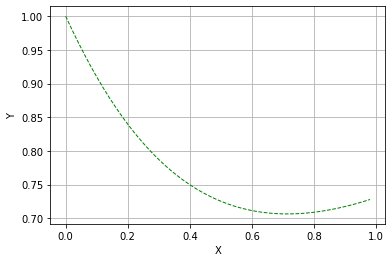

In [19]:
t_eval = [i/100 for i in range(0, 100, 2)]
y_ode45 = sp.solve_ivp(difur, segment, [u0, 1], t_eval=t_eval)
plot(grid, y_ode45.y[0], end=True, type='--g')

Задание 4.
> Построить графики, сравнить результаты



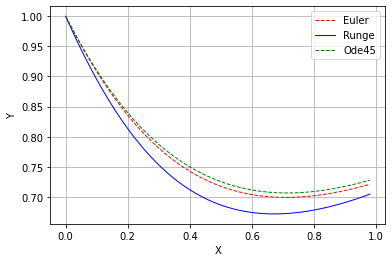

In [20]:
plot(grid, y_Euler, type='--r', label='Euler')
plot(grid, y_Runge, label='Runge')    
plot(grid, y_ode45.y[0], end=True, label="Ode45", type='--g')

`Можно сделать вывод,что несмотря на различие методов Рунге и Эйлера, график встроенной функции и метода эйлера схожи.`
